# **Unsupervised learning on Cancer Rates datas**

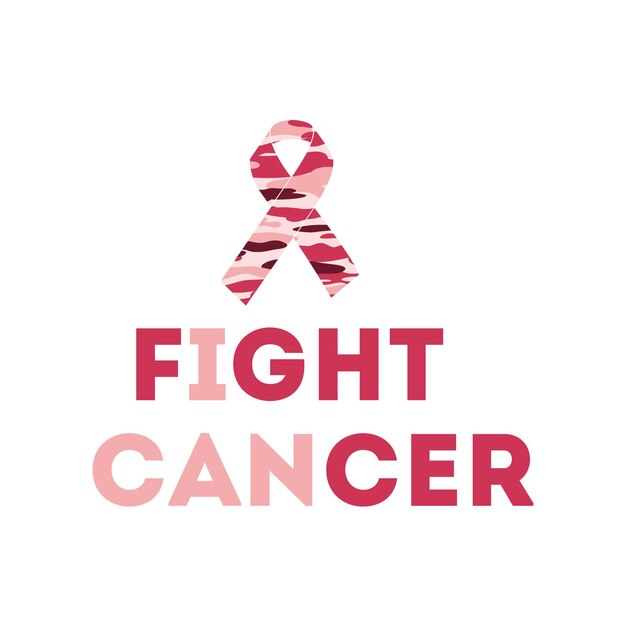

**Authors:**

* FOZAME ENDEZOUMOU Armand Bryan
* Jessica MBOUNKAP
* Maheni SOUMAH
* LEUMALEU MBOUYOM Arnold Vianey
* William TOWA Darryl KENGNE
* Habiba  DJIGO




## Business Understanding

The Lake County, located in the state of Illinois, USA, houses a non-federal database rich in crucial information on various types of cancer such as colorectal, lung, breast, etc. These data provide precise figures on the number of people affected by cancer in this region, covering the period from September 2022 to December 2023. You can download the database from the following link: [link to the database](https://catalog.data.gov/dataset/cancer-rates-5cf0c).

This work aims to explore the data to visualize the areas in Lake County where cancer prevalence is highest, thus better understanding cancer risk areas. The ultimate goal is to identify curative and, most importantly, preventive solutions.

We will use unsupervised learning techniques to enhance data interpretability and better understand factors correlated with cancer. We will also focus on data visualization, allowing us to gain deeper insights from the available data.

By combining these approaches, we will gain a better understanding of the geographic distribution of cancer in Lake County and propose targeted preventive and awareness measures to reduce cancer incidence in the region.

## Data Understanding


**Explanation of field attributes:**

Colorectal Cancer - Cancer that develops in the colon (the longest part of the large intestine) and/or the rectum (the last several inches of the large intestine). This is a rate per 100,000.

Lung Cancer – Cancer that forms in tissues of the lung, usually in the cells lining air passages. This is a rate per 100,000.

Breast Cancer – Cancer that forms in tissues of the breast. This is a rate per 100,000.       

Prostate Cancer – Cancer that forms in tissues of the prostate. This is a rate per 100,000.

Urinary System Cancer – Cancer that forms in the organs of the body that produce and discharge urine. These include the kidneys, ureters, bladder, and urethra. This is a rate per 100,000.

All Cancer – All cancers including, but not limited to: colorectal cancer, lung cancer, breast cancer, prostate cancer, and cancer of the urinary system. This is a rate per 100,000.

In [1]:
!pip install wget # Helpful to download data in github source

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=fb3d095de24f6f0f9a35f108338a442823329ddf172506182f2ecd571ebfb3b0
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
# Import libraries
import wget
from warnings import filterwarnings
import numpy as np
import pandas as pd
import geopandas as gpd

import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
filterwarnings("ignore")# Ignore warnings
plt.style.use("seaborn-whitegrid")# Style seaborn

In [4]:
# import data from the github

url_csv = 'https://raw.githubusercontent.com/Bryan-Foxy/ml-project/non-unsupervised-learning/datas/Cancer_Rates.csv' # csv file
url_geopandas = 'https://raw.githubusercontent.com/Bryan-Foxy/ml-project/non-unsupervised-learning/datas/LakeCounty_Health_6533455732877314617.geojson' # geopandas file

wget.download(url_csv, 'Cancer_Rates.csv') # Download the csv file
wget.download(url_geopandas, 'Cancer_Rates.geojson') # Download the geopandas file

'Cancer_Rates.geojson'

In [5]:
# Load csv file
df=pd.read_csv('/content/Cancer_Rates.csv')

In [6]:
df.head()

,FID,ZIP,Colorectal,Lung_Bronc,Breast_Can,Prostate_C,Urinary_Sy,All_Cancer,SHAPE_Length,SHAPE_Area
0,1,60002,218.062127,419.666735,399.094836,259.205925,259.205925,2703.147501,215525.155184,1.149062e+09
1,2,60010,258.915706,335.464697,504.322767,499.819885,227.395533,3248.829251,178637.109618,8.027354e+08
2,3,60015,153.435867,230.153801,478.573777,442.041428,222.847331,2922.587952,111400.890558,3.674576e+08
3,4,60020,292.797189,507.515128,214.717939,302.557095,370.876440,3084.130392,92363.084625,1.666177e+08
4,5,60030,221.535432,284.440555,404.780789,322.730629,210.595411,2581.845035,247258.224672,8.455179e+08


In [7]:
# Info about the csv file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FID           27 non-null     int64  
 1   ZIP           27 non-null     int64  
 2   Colorectal    27 non-null     float64
 3   Lung_Bronc    27 non-null     float64
 4   Breast_Can    27 non-null     float64
 5   Prostate_C    27 non-null     float64
 6   Urinary_Sy    27 non-null     float64
 7   All_Cancer    27 non-null     float64
 8   SHAPE_Length  27 non-null     float64
 9   SHAPE_Area    27 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 2.2 KB


Data types:
Eight columns have the float64 data type.
Two columns have data type int64 (FID and ZIP).

In [8]:
df.describe()

,FID,ZIP,Colorectal,Lung_Bronc,Breast_Can,Prostate_C,Urinary_Sy,All_Cancer,SHAPE_Length,SHAPE_Area
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01
mean,14.000000,60053.555556,215.662049,305.559073,392.842186,320.079975,222.191454,2628.278959,146386.746889,4.695389e+08
std,7.937254,27.169459,77.162061,107.413853,122.334193,100.547764,87.796594,694.582068,54274.898427,2.938934e+08
min,1.000000,60002.000000,55.555556,182.810215,203.903701,145.973430,56.610894,1465.294184,25907.372467,1.780943e+07
25%,7.500000,60037.500000,175.618187,226.001013,292.531320,249.675972,175.552775,2211.783855,107057.014342,2.202751e+08
50%,14.000000,60047.000000,214.198286,280.606615,398.749247,303.270042,208.090299,2581.845035,161457.245301,3.919550e+08
75%,20.500000,60078.000000,249.823041,337.896841,482.168766,390.328403,243.300729,3039.894429,179404.536027,6.772510e+08
max,27.000000,60099.000000,457.776172,578.243585,626.430551,499.819885,421.635947,4505.481267,247258.224672,1.149062e+09


.Cancer data varies significantly between types, with means ranging from 55.56 to 457.78.
There is some variation, as evidenced by the relatively large standard deviations
.The DataFrame contains 27 entries




In [9]:
df.shape

(27, 10)

There is 27 rows and 10 columns.

In [10]:
df.isnull().sum()

FID             0
ZIP             0
Colorectal      0
Lung_Bronc      0
Breast_Can      0
Prostate_C      0
Urinary_Sy      0
All_Cancer      0
SHAPE_Length    0
SHAPE_Area      0
dtype: int64

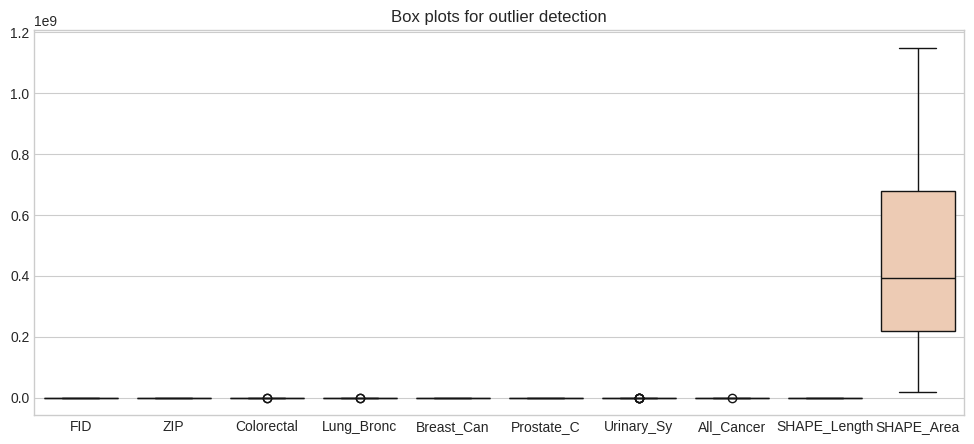

In [11]:
# Select numeric columns for outlier analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Use boxplots to visualize outliers
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[numeric_columns], palette = "rocket")
plt.title('Box plots for outlier detection')
plt.show()

Here, we observe that we do not have any outliers.

This is fantastic!

Now, it's time to visualize the statistical distribution of our data. Do they follow a normal distribution? Let's find out.

It is crucial to have an understanding of the distribution of our data because it helps us gain insights into the underlying patterns and characteristics of the dataset. This knowledge allows us to make informed decisions and choose appropriate statistical methods for analysis and modeling. Additionally, understanding the distribution can help us identify any potential biases or anomalies in the data that may need further investigation.

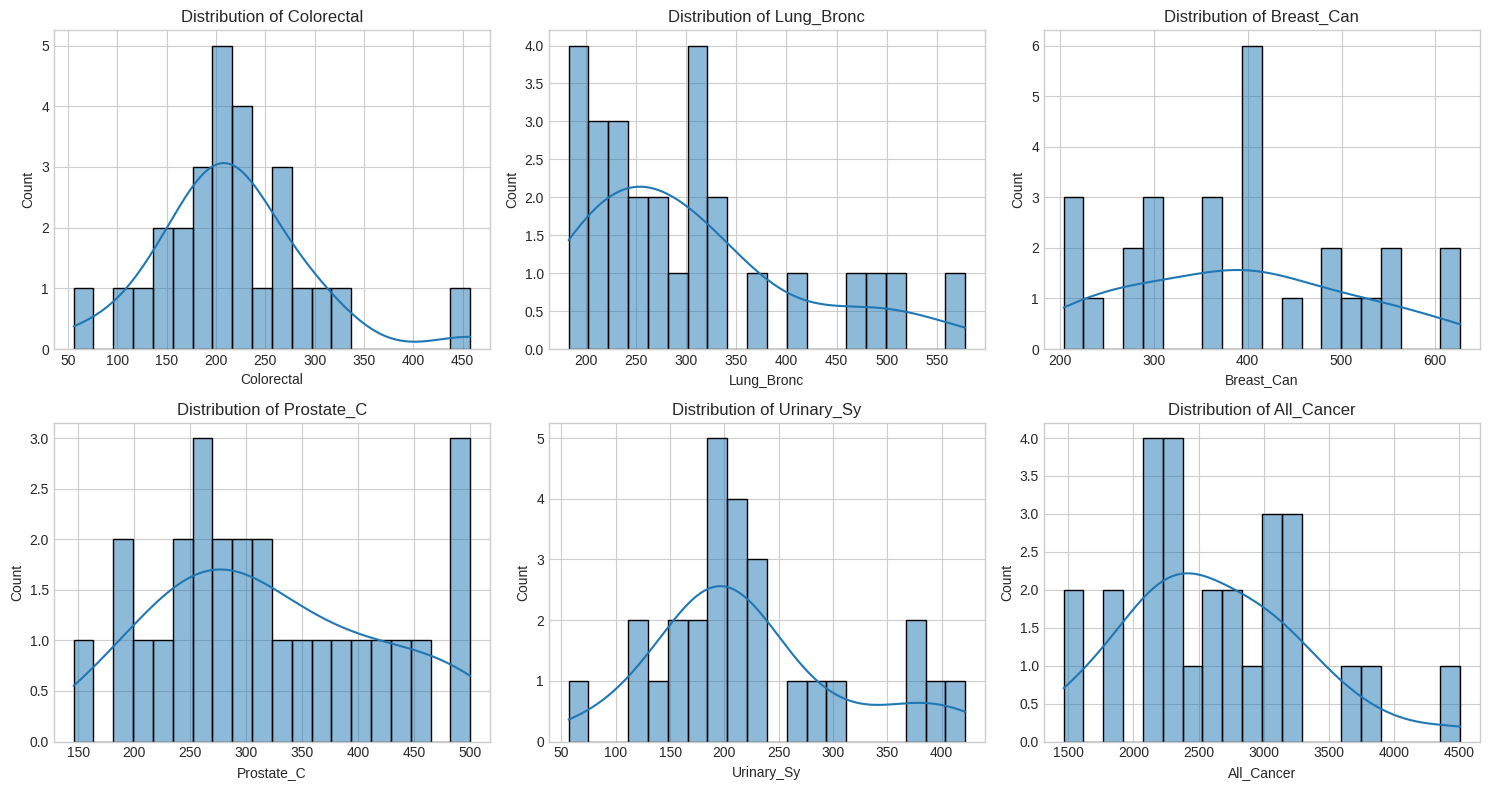

In [12]:
# Selecting the columns of interest (types of cancer)
cancer_columns = ['Colorectal', 'Lung_Bronc', 'Breast_Can', 'Prostate_C', 'Urinary_Sy', 'All_Cancer']

# Setting up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Creating histograms for each type of cancer
for i, cancer_type in enumerate(cancer_columns):
    sns.histplot(df[cancer_type], ax=axes[i], bins=20, kde=True)
    axes[i].set_title(f'Distribution of {cancer_type}')

# Adjusting layout
plt.tight_layout()
plt.show()

In [13]:
# Infos on columns types and number of null values
new_df=df.drop(columns=["FID","ZIP","SHAPE_Length","SHAPE_Area"])
tab_info=pd.DataFrame(new_df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(new_df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(new_df.isnull().sum()/new_df.shape[0]*100).T.rename(index={0:'null values (%)'}))

In [14]:
tab_info

,Colorectal,Lung_Bronc,Breast_Can,Prostate_C,Urinary_Sy,All_Cancer
column type,float64,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Number of duplicates
new_df.duplicated().sum()

0

Now we will move on to the second dataset, which is a dataset in geojson format. It is particular because it represents the geographic map of a region, and as you may have guessed, it is the geographical data of Lake County in the state of Illinois.

To open such a format, we simply use the `geopandas` library, which can be imported as follows:

```python
import geopandas as gpd


In [16]:
# Load geopandas data
gdf = gpd.read_file("/content/Cancer_Rates.geojson")
gdf.head()

,OBJECTID,ZIP,Colorectal,Lung_Bronc,Breast_Can,Prostate_C,Urinary_Sy,All_Cancer,geometry
0,1,60002,218.062127,419.666735,399.094836,259.205925,259.205925,2703.147501,"POLYGON ((1087210.141 2123068.712, 1087016.524..."
1,2,60010,258.915706,335.464697,504.322767,499.819885,227.395533,3248.829251,"POLYGON ((1043125.987 2030393.498, 1042782.981..."
2,3,60015,153.435867,230.153801,478.573777,442.041428,222.847331,2922.587952,"POLYGON ((1114634.056 2017318.644, 1114456.579..."
3,4,60020,292.797189,507.515128,214.717939,302.557095,370.876440,3084.130392,"POLYGON ((1030794.477 2094083.825, 1031716.470..."
4,5,60030,221.535432,284.440555,404.780789,322.730629,210.595411,2581.845035,"POLYGON ((1074365.439 2074754.258, 1074674.419..."


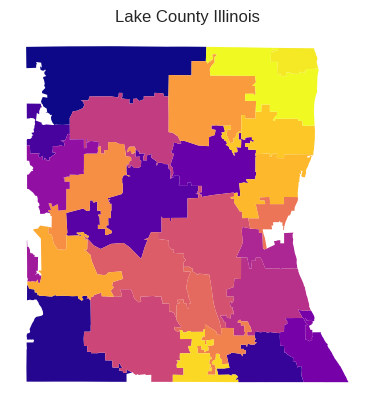

In [17]:
# Plot the map by focus on the ZIP column
map=gdf.plot(column="ZIP",aspect=1, cmap='plasma')
map.set_axis_off()
plt.title('Lake County Illinois')
plt.show()

## Data Preprocessing

## Modelisation

Unsupervised learning is a branch of machine learning where algorithms are trained on unlabeled data, without supervision or explicit guidance on the expected outcomes. These algorithms seek to discover intrinsic structures or underlying patterns in the data by identifying similarities, patterns, or clusters that are not previously known. This approach enables exploration and understanding of data autonomously, without requiring human supervision to guide the learning process. Unsupervised learning techniques are widely used in various fields such as image segmentation, anomaly detection, content recommendation, and dimensionality reduction.

**Clustering:**

Clustering is a technique used in unsupervised learning to group data points together based on various factors, creating clusters that share similarities. This technique is highly valuable and serves multiple purposes, such as segmentation and pattern recognition.

We will employ this technique to estimate and determine the groups present in our dataset, providing a pseudo-label (**y**) for each data point and projecting these results onto our map.

For this task, we will use the **K-Means** method. K-Means is a popular clustering algorithm known for its simplicity and efficiency. It iteratively assigns data points to K clusters based on their proximity to the cluster centroids, which are updated until convergence. K-Means is advantageous for its scalability and speed, making it suitable for large datasets. However, it has limitations, such as the need to specify the number of clusters (**K**) beforehand, which may not always be straightforward, and its sensitivity to initial centroid selection.

To determine the optimal value of **K**, we will employ the elbow method. This method involves plotting the sum of squared distances from each point to its assigned centroid for different values of **K**. The optimal **K** value is typically chosen at the "elbow" point, where the rate of decrease in the sum of squared distances starts to slow down significantly.

By applying the K-Means clustering algorithm and identifying the optimal number of clusters using the elbow method, we aim to reveal meaningful patterns and groupings within our dataset, providing insights into the spatial distribution and characteristics of the Lake County region in Illinois.

**Elbow method**

The elbow method is used here to observe the optimal K.

We take a list of numerical values and use K-means for each K value. This allows us to compute the sum of squared distances from each point to its assigned center for each K. By plotting these values against the corresponding K values, we can visually identify the "elbow" point where the rate of decrease in the sum of squared distances starts to slow down. This "elbow" point often represents the optimal number of clusters for our dataset.



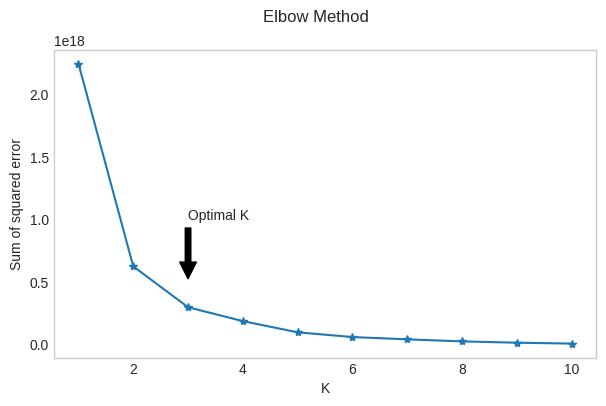

In [18]:
# Elbow method code
k_rng = range(1,11)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df)
  sse.append(km.inertia_)

# Figure of optimal
optimal_k = 3
fig, ax = plt.subplots(1,1)
fig.set_size_inches(7,4)
fig.suptitle("Elbow Method")
ax.set_xlabel("K")
ax.grid()
ax.set_ylabel("Sum of squared error")

# Add an arrow above the x-axis at the position of the optimal K
ax.annotate('Optimal K', xy=(optimal_k, 0.5e18), xytext=(3, 1e18),
            arrowprops=dict(facecolor='black', shrink=0.05))


ax.plot(k_rng, sse, marker = "*")
plt.show()

The elbow method showed us that the optimum number of cluster is 2 or 3

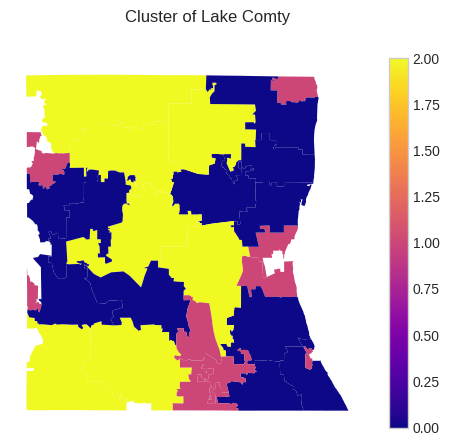

In [19]:
# Compute KMEANs
km = KMeans(n_clusters=3, random_state = 0)
km.fit(df)

# Figure
gdf["cluster"] = km.labels_
fig, ax = plt.subplots(1, 1)
ax.axis("off")
fig.suptitle("Cluster of Lake Comty")
gdf.plot(column='cluster', ax=ax, legend=True, cmap = "plasma")
plt.show()

Here is the result of our KMEANS on the map. We can see that the map has been segmented into 3 distinct groups.

We will explore further to understand exactly what these 3 groups mean.

**Note that it is not necessary to use `DBSCAN` here because our data is well-organized and not dense. We only have 24 observations and 10 columns.**

KMEANS is a good choice for this problem.

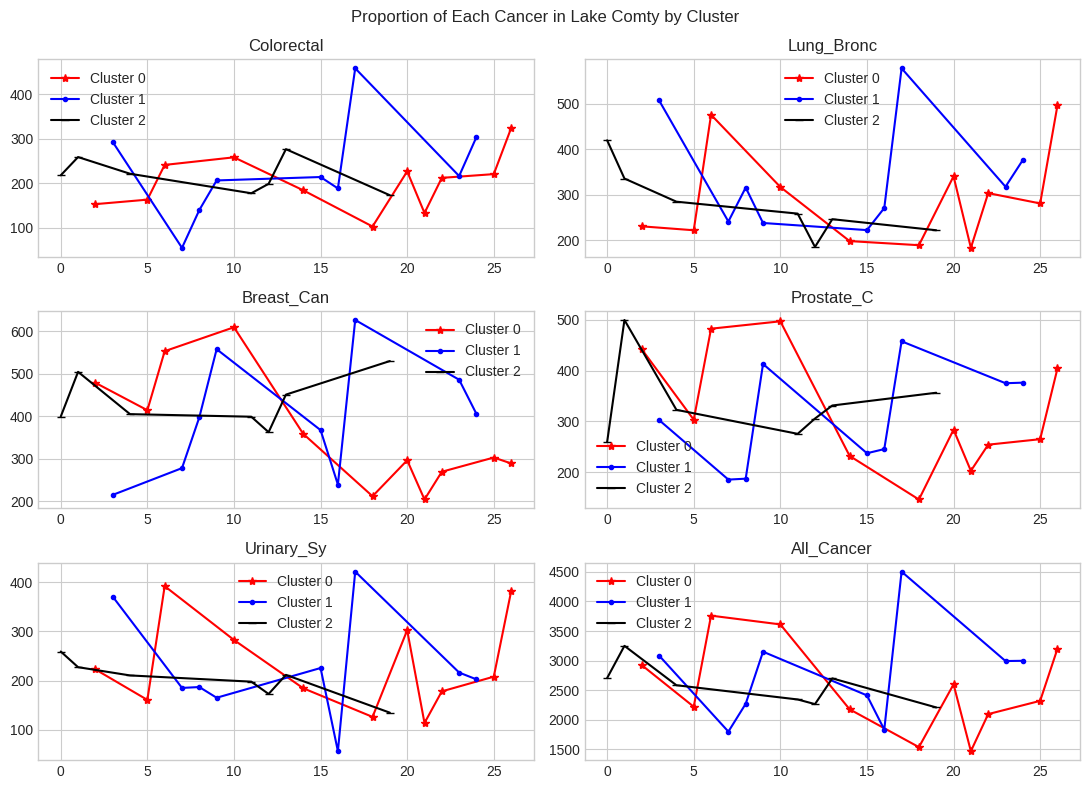

In [20]:
# df = df.drop("cluster", axis = 1)
df["cluster"] = km.predict(df)

# Create figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(11, 8))  # Set figure size explicitly
fig.suptitle("Proportion of Each Cancer in Lake Comty by Cluster")

# Iterate through columns and create subplots
for i, col in enumerate(cancer_columns):
    row, col_index = divmod(i, 2)  # Calculate row and column indices
    axes[row, col_index].plot(df[df["cluster"] == 0][col], color="red", label="Cluster 0", marker = "*")
    axes[row, col_index].plot(df[df["cluster"] == 1][col], color="blue", label="Cluster 1", marker = ".")
    axes[row, col_index].plot(df[df["cluster"] == 2][col], color="black", label="Cluster 2", marker = "_")
    axes[row, col_index].set_title(col)
    axes[row, col_index].legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

`Interpretation:`

Upon analyzing the clustering results for the five types of cancer, several observations emerge:

* Across all cancer types, clusters 0 and 1 consistently exhibit the highest number of observations and incidence of cases. This suggests that these clusters represent regions or populations with a higher prevalence of cancer.

* Cluster 2 appears to represent areas with relatively lower cancer incidence, as it consistently shows fewer cases compared to other clusters.

* On the other hand, cluster 0 consistently exhibits the highest number of cancer cases. This cluster could be indicative of regions with a higher risk of cancer incidence, often referred to as "red zones."

* Therefore, based on the clustering results, the region corresponding to cluster 2, which exhibits the least number of cases, can be considered a low-risk area. In contrast, the cluster 1 shows a higher incidence of cases, while the cluster 0 stands out as the largest cluster with the highest number of cancer cases observed.

This analysis underscores the importance of clustering in identifying geographical areas or populations with varying levels of cancer incidence. By pinpointing areas with higher or lower cancer prevalence, healthcare resources can be better allocated to address the needs of specific communities.

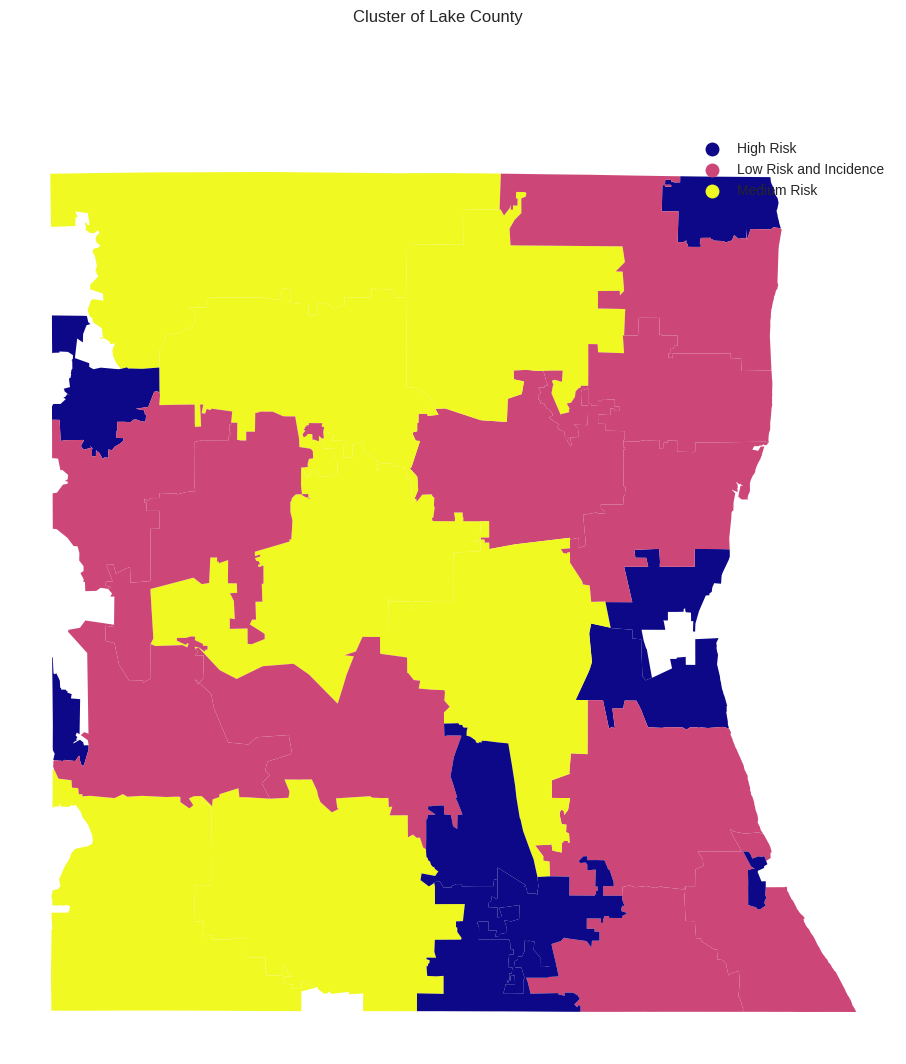

In [32]:
# Define cluster labels
cluster_labels = {
    0: "Low Risk and Incidence",
    1: "High Risk",
    2: "Medium Risk"
}

# Plotting with legend
gdf["cluster_label"] = gdf["cluster"].map(cluster_labels)
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,12)
ax.axis("off")
fig.suptitle("Cluster of Lake County")
gdf.plot(column='cluster_label', ax=ax, legend=True, cmap = "plasma")
plt.show()


**Dimensionality Reduction:**

In a dataset, it is often crucial to visualize data graphically for better interpretability and to identify relationships more accurately. Graphical representation in 2D or 3D is common, as beyond 3D, it becomes challenging to visualize data. However, with datasets typically containing more than two or three columns, dimensionality reduction techniques become essential to compress the information into two or three dimensions, facilitating projection into space.

To achieve this, various techniques are employed, including Principal Component Analysis (PCA). PCA, a widely-used unsupervised learning method, effectively reduces the dimensionality of a dataset, compresses information, enables projection, and aids in feature selection.

The key aspect of PCA is its ability to reduce dimensions while retaining maximum information:

* Centralization of the mean to mitigate the effects of different scales. We will use StandardScaler. At this stage, our data is treated as a matrix in the mathematical sense.
* Computation of covariance. Covariance between two random variables quantifies their joint deviations from their respective expectations.
* Calculation of eigenvectors and eigenvalues. Eigenvectors represent preferred axes where an application of a space to itself behaves like a dilation, multiplying vectors by a constant called the eigenvalue. The vectors to which it applies are called eigenvectors, grouped into an eigenspace.
* Selection of eigenvectors with the largest eigenvalues.
* Projection of our data onto these eigenvectors.

By applying PCA, we transform the original dataset into a new space defined by the selected eigenvectors, effectively reducing its dimensionality while preserving as much information as possible.


<center><img src="https://devopedia.org/images/article/139/4543.1548137789.jpg" width="70%"></center>


In [26]:
print("We have {} dimensions in our dataset.".format(df.shape[1]))

We have 11 dimensions in our dataset.


In [27]:
# recalibrates data for normal distributions
sc = StandardScaler()
df_scaler = sc.fit_transform(df)
print("Shape of df standardize: {}".format(df_scaler.shape))
df_scaler[1]

Shape of df standardize: (27, 11)


array([-1.54065777, -1.63364534,  0.57123423,  0.28371859,  0.92863825,
        1.82165996,  0.06040341,  0.91043433,  0.60552321,  1.15532956,
        1.42992337])

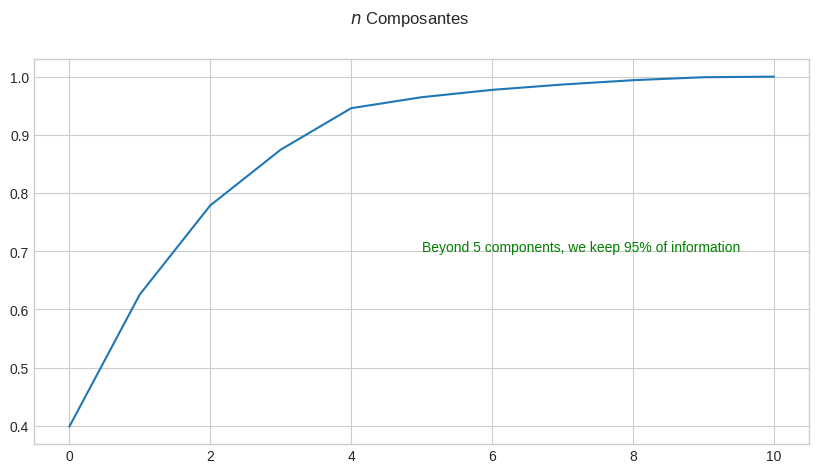

In [28]:
# PCA
pca = PCA(n_components = df.shape[1])
data_pca = pca.fit_transform(df_scaler)

# Variance ratio
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
fig.suptitle("$n$ Composantes")
ax.plot(np.cumsum(pca.explained_variance_ratio_))
component = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95 )
ax.text(x = 5, y = 0.7, s = f"Beyond {component} components, we keep 95% of information", color = "green")
plt.show()

We calculated the **PCA** considering the maximum number of components, which is 11, representing the total number of observations contained in the matrix. From the previous algorithms, we observe that to retain 95% of the information, we need to keep a maximum of 5 components out of the total 11.

Now, after these analyses, we will visualize the data after **PCA** with and without standardization. Standardization is a process that centers the data, making it more comparable.


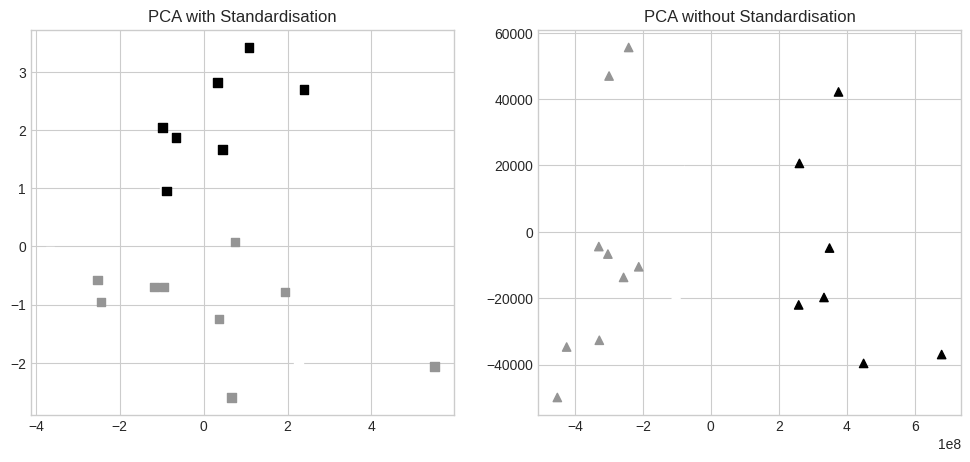

In [29]:
# Compute PCA without standardization
data_pca_no_stand = pca.fit_transform(df)
# Scatter 2D
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12,5)
ax1.scatter(data_pca[:,0], data_pca[:,1], marker = "s", c = df["cluster"])
ax1.set_title("PCA with Standardisation")
ax2.scatter(data_pca_no_stand[:,0], data_pca_no_stand[:,1], marker = "^", c = df["cluster"])
ax2.set_title("PCA without Standardisation")

plt.show()

`Interpretation of the figures`

We can observe that the standardized data are on a smaller scale and do not spread out in space (as seen by the axes of the two figures, the other one is at 1e8).

This is important to note in order to realize the usefulness of this technique.


`About t-SNE`

**t-SNE** is a nonlinear feature extraction algorithm that constructs a new representation of the data such that data points close in the original space have a high probability of having close representations in the new space.

PCA and t-SNE have inherently different objectives:
- PCA aims to reduce the dimensionality of data by finding linear combinations of variables that explain the most variance in the data.
- t-SNE, on the other hand, is primarily used for visualizing high-dimensional data by reducing it to 2 or 3 dimensions while preserving the nonlinear relationships between points.

We can also discuss the concepts of linearity and non-linearity:
- PCA is a linear method that does not capture nonlinear structures well in the data.
- t-SNE is specifically designed to capture nonlinear structures by preserving local distances between points in the reduced-dimensional space.

Relation with outliers:
- PCA is sensitive to outliers because it is based on the variance of the data.
- t-SNE is also sensitive to outliers, but to a lesser extent, as it focuses more on the local structure of the data.

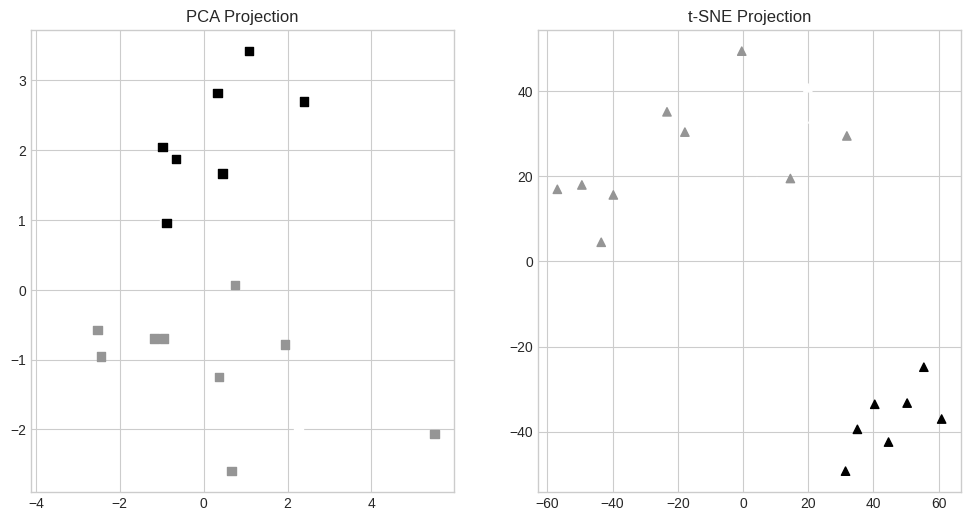

In [30]:
# Perform PCA
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(df_scaler)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity = 5)
data_tsne = tsne.fit_transform(df_scaler)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot PCA projection
axs[0].set_title("PCA Projection")
axs[0].scatter(data_pca[:, 0], data_pca[:, 1], marker='s', c = df["cluster"])

# Plot t-SNE projection
axs[1].set_title("t-SNE Projection")
axs[1].scatter(data_tsne[:, 0], data_tsne[:, 1], marker='^', c = df["cluster"])

plt.show()

We can observe that the data is better organized with t-SNE.

The optimal number of neighbors was found to be 2 and 3.

We clearly notice two distinct clusters as predicted by our KMeans, and upon closer inspection, a third cluster is also apparent.

This discrepancy might arise from the fact that in 2D, it's more challenging to visualize the data comprehensively.

Let's proceed to visualize the data in 3D.

In [31]:
# PCA with 3 components
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(df_scaler)

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=data_pca_3d[:, 0],
    y=data_pca_3d[:, 1],
    z=data_pca_3d[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color = df["cluster"],
        colorscale='plasma',
        opacity=0.8
    )
)])

# Add title and labels
fig.update_layout(
    title="3D PCA Projection",
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

# Show the plot
fig.show()